## Import all the packages

In [514]:
import os, sys 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
from PIL import Image
import glob
from skimage import img_as_ubyte
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Display the image characteristics and image

In [515]:
#Give your path according where your dataset is.
img_path = '/Users/GHOST/Desktop/Cat/2.jpeg' 
idis = Image.open(img_path)
print( '{}'.format(idis.format))
print('size: {}'.format(idis.size))
print('image mode: {}'.format(idis.mode))
idis.show()

JPEG
size: (300, 169)
image mode: RGB


## Empty lists to store images

In [516]:
image_cat_list = []
image_butterfly_list = []
resizedcat_images = []
resizedbutterfly_images = []

## Append images to the lists

In [517]:
for imagename in glob.glob('/Users/GHOST/Desktop/Cat/*.jpeg'):
    print(imagename)
    img = Image.open(imagename)
    image_cat_list.append(img)

/Users/GHOST/Desktop/Cat\12.jpeg
/Users/GHOST/Desktop/Cat\16.jpeg
/Users/GHOST/Desktop/Cat\2.jpeg
/Users/GHOST/Desktop/Cat\26.jpeg
/Users/GHOST/Desktop/Cat\34.jpeg
/Users/GHOST/Desktop/Cat\43.jpeg
/Users/GHOST/Desktop/Cat\44.jpeg
/Users/GHOST/Desktop/Cat\5.jpeg
/Users/GHOST/Desktop/Cat\50.jpeg
/Users/GHOST/Desktop/Cat\51.jpeg
/Users/GHOST/Desktop/Cat\6.jpeg
/Users/GHOST/Desktop/Cat\61.jpeg
/Users/GHOST/Desktop/Cat\67.jpeg
/Users/GHOST/Desktop/Cat\7.jpeg
/Users/GHOST/Desktop/Cat\78.jpeg
/Users/GHOST/Desktop/Cat\9.jpeg
/Users/GHOST/Desktop/Cat\91.jpeg
/Users/GHOST/Desktop/Cat\93.jpeg


In [518]:
print(len(image_cat_list))

18


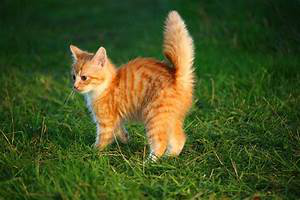

In [519]:
image_cat_list[0]

In [520]:
for imagebutter in glob.glob('/Users/GHOST/Desktop/Butterfly/*.jpg'):
    print(imagebutter)
    imgbut = Image.open(imagebutter)
    image_butterfly_list.append(imgbut)

/Users/GHOST/Desktop/Butterfly\e030b20928e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
/Users/GHOST/Desktop/Butterfly\e030b20929e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
/Users/GHOST/Desktop/Butterfly\e030b2092ce90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
/Users/GHOST/Desktop/Butterfly\e030b20a20e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
/Users/GHOST/Desktop/Butterfly\e132b60e2af51c22d2524518b7444f92e37fe5d404b0144390f8c770a3e5b7_640.jpg
/Users/GHOST/Desktop/Butterfly\e831b00c2ef3093ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
/Users/GHOST/Desktop/Butterfly\e831b50f2df71c22d2524518b7444f92e37fe5d404b0144390f8c770a2e9b5_640.jpg
/Users/GHOST/Desktop/Butterfly\e832b00a2df11c22d2524518b7444f92e37fe5d404b0144390f8c770a2e9b5_640.jpg
/Users/GHOST/Desktop/Butterfly\e832b10a2fe90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
/Users/GHOST/Desktop/Butterfly\e832b60c2ffc1c22d2524518b7444f92e37fe5d404b0144390f8c770a1e

In [521]:
print(len(image_butterfly_list))

30


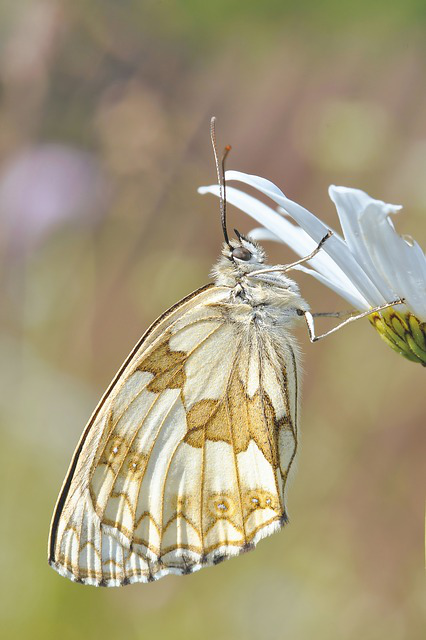

In [522]:
image_butterfly_list[0]

## Resize the images

In [523]:
#Now for the second cat list we will do the same
for file in glob.glob('/Users/GHOST/Desktop/Cat/*.jpeg'):
    print(file)
    img = cv2.imread(file,1) #For B/W pass 0
    #Resizing images to the same dimension
    img = cv2.resize(img,(256, 256)) 
    resizedcat_images.append(img)

/Users/GHOST/Desktop/Cat\12.jpeg
/Users/GHOST/Desktop/Cat\16.jpeg
/Users/GHOST/Desktop/Cat\2.jpeg
/Users/GHOST/Desktop/Cat\26.jpeg
/Users/GHOST/Desktop/Cat\34.jpeg
/Users/GHOST/Desktop/Cat\43.jpeg
/Users/GHOST/Desktop/Cat\44.jpeg
/Users/GHOST/Desktop/Cat\5.jpeg
/Users/GHOST/Desktop/Cat\50.jpeg
/Users/GHOST/Desktop/Cat\51.jpeg
/Users/GHOST/Desktop/Cat\6.jpeg
/Users/GHOST/Desktop/Cat\61.jpeg
/Users/GHOST/Desktop/Cat\67.jpeg
/Users/GHOST/Desktop/Cat\7.jpeg
/Users/GHOST/Desktop/Cat\78.jpeg
/Users/GHOST/Desktop/Cat\9.jpeg
/Users/GHOST/Desktop/Cat\91.jpeg
/Users/GHOST/Desktop/Cat\93.jpeg


In [524]:
for file in glob.glob('/Users/GHOST/Desktop/Butterfly/*.jpg'):
    print(file)
    img = cv2.imread(file,1)
    #Resizing images to the same dimension
    img = cv2.resize(img,(256, 256))     
    resizedbutterfly_images.append(img)

/Users/GHOST/Desktop/Butterfly\e030b20928e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
/Users/GHOST/Desktop/Butterfly\e030b20929e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
/Users/GHOST/Desktop/Butterfly\e030b2092ce90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
/Users/GHOST/Desktop/Butterfly\e030b20a20e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
/Users/GHOST/Desktop/Butterfly\e132b60e2af51c22d2524518b7444f92e37fe5d404b0144390f8c770a3e5b7_640.jpg
/Users/GHOST/Desktop/Butterfly\e831b00c2ef3093ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
/Users/GHOST/Desktop/Butterfly\e831b50f2df71c22d2524518b7444f92e37fe5d404b0144390f8c770a2e9b5_640.jpg
/Users/GHOST/Desktop/Butterfly\e832b00a2df11c22d2524518b7444f92e37fe5d404b0144390f8c770a2e9b5_640.jpg
/Users/GHOST/Desktop/Butterfly\e832b10a2fe90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
/Users/GHOST/Desktop/Butterfly\e832b60c2ffc1c22d2524518b7444f92e37fe5d404b0144390f8c770a1e

In [525]:
resizedbutterfly_images = np.array(resizedbutterfly_images) #Converting the list into the numpy array

In [526]:
resizedbutterfly_images.shape #By this we know that we have 30 photos and their dimensions are same

(30, 256, 256, 3)

In [527]:
resizedcat_images = np.array(resizedcat_images)

In [528]:
resizedcat_images.shape

(18, 256, 256, 3)

## Saving all the resized images as new images

In [529]:
path = '/Users/GHOST/Desktop/Resizedbutterfly\\'
#Create New folder
if not os.path.exists(path):
    os.makedirs(path)

In [530]:
#Storing Butterfly Resized Images
img_no = 1
for image in range(resizedbutterfly_images.shape[0]):
    input_img = resizedbutterfly_images[image,:,:] 
    con_image = img_as_ubyte(input_img)
    cv2.imwrite(path+str(img_no)+".jpg", con_image)
    img_no +=1

In [531]:
#Storing Cat Resized Images
c_path = '/Users/GHOST/Desktop/Resizedcat\\'
#Create New folder
if not os.path.exists(c_path):
    os.makedirs(c_path)

In [532]:
img_cno = 1
for image in range(resizedcat_images.shape[0]):
    input_img = resizedcat_images[image,:,:] 
    con_image = img_as_ubyte(input_img)
    cv2.imwrite(c_path+str(img_cno)+".jpeg", con_image)
    img_cno +=1

## Normalize the images

In [533]:
X1_norbutterfly = resizedbutterfly_images / 255
X2_norcat = resizedcat_images / 255

## Image Augmentation Using Keras

In [534]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=15,
           width_shift_range=0.1, #we can try different values as well
           height_shift_range=0.1,
           zoom_range=0.1,
           vertical_flip=False,
           horizontal_flip=True,
           fill_mode="reflect")
## Don't add too much rotation if you are going for accuracy, it may hurt.

In [535]:
#Storing Cat Resized Augmented Images
caug_path = '/Users/GHOST/Desktop/Resizedcat/Augmented\\'
#Create New folder
if not os.path.exists(caug_path):
    os.makedirs(caug_path)

In [536]:
i=0
for batch in image_generator.flow(resizedcat_images, batch_size = 5,
                                 save_to_dir=caug_path,
                                 save_prefix = 'cat', save_format= 'jpeg'):
    i +=1
    if i>10:
        break
        ## We used .flow() to generate randomly images

In [537]:
#Storing Butterfly Resized Augmented Images
cbut_path = '/Users/GHOST/Desktop/Resizedbutterfly/Augmented\\'
#Create New folder
if not os.path.exists(cbut_path):
    os.makedirs(cbut_path)

In [538]:
i=0
for batch in image_generator.flow(resizedbutterfly_images, batch_size = 5,
                                 save_to_dir=cbut_path,
                                 save_prefix = 'butterfly', save_format= 'jpg'):
    i +=1
    if i>10:
        break

In [539]:
## We Used Flipping, Rotation, and other methods on our images 
#  with image augmentation to deal with data imbalance.